**Step 1: Data Exploration & Cleaning**

In [ ]:
# Load dataset

from google.colab import files
uploaded = files.upload()



Saving Admission_Predict.csv to Admission_Predict (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('Admission_Predict.csv')
df.rename(columns={'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)
df.drop(columns=['Serial No.'], inplace=True)
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


from matplotlib import pyplot as plt
_df_0['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['University Rating'].plot(kind='hist', bins=20, title='University Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SOP'].plot(kind='hist', bins=20, title='SOP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TOEFL Score', y='University Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='University Rating', y='SOP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SOP', y='LOR ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GRE Score'].plot(kind='line', figsize=(8, 4), title='GRE Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['TOEFL Score'].plot(kind='line', figsize=(8, 4), title='TOEFL Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['University Rating'].plot(kind='line', figsize=(8, 4), title='University Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SOP'].plot(kind='line', figsize=(8, 4), title='SOP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


**Step 2: Data Visualization & Correlation**

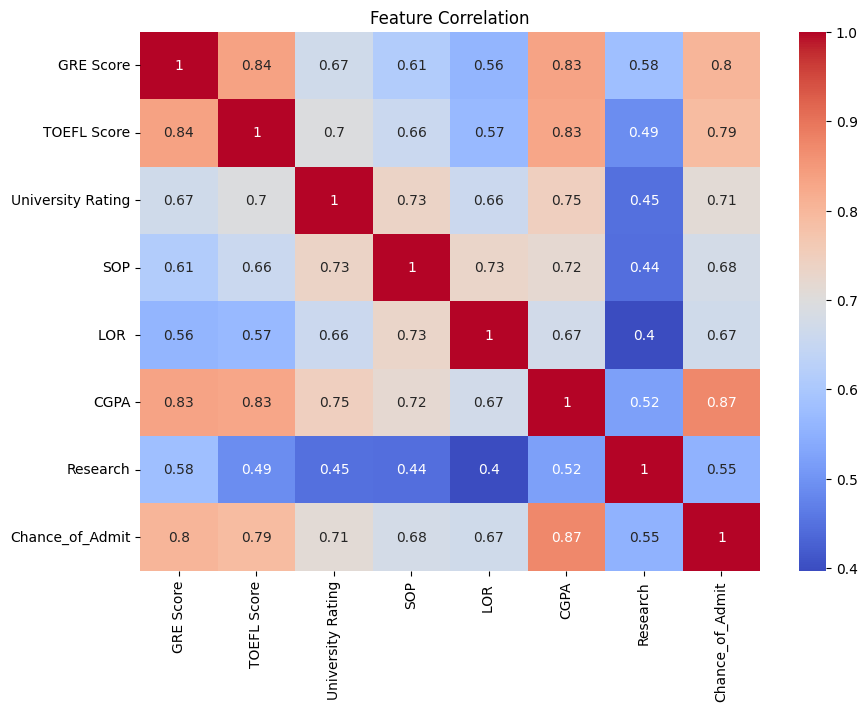

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


**Step 3: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split features and target
X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.8212082591486993
MSE: 0.004617003377285005


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,feature,VIF
0,GRE Score,1438.451789
1,TOEFL Score,1349.746948
2,University Rating,22.143705
3,SOP,38.050177
4,LOR,38.411722
5,CGPA,1080.491179
6,Research,2.859938


from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='hist', bins=20, title='VIF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
vif_data.groupby('feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(vif_data['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(vif_data, x='VIF', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Step 4: Decision Tree & Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))


Decision Tree R²: 0.7921210170415511


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define param grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
rs = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
rs.fit(X_train, y_train)

best_rf = rs.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest R²: 0.803137337852925


**Step 5: Feature Selection & Retraining**

In [ ]:
importances = best_rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
top_5 = feat_importance[:5]
top_5


,0
CGPA,0.845590
GRE Score,0.119445
TOEFL Score,0.014873
SOP,0.010133
Research,0.005893


In [ ]:
X_top5 = X[top_5.index]
X_train_top5, X_test_top5 = train_test_split(X_top5, test_size=0.2, random_state=42)

best_rf.fit(X_train_top5, y_train)
y_pred_top5 = best_rf.predict(X_test_top5)

print("Random Forest with Top 5 R²:", r2_score(y_test, y_pred_top5))


Random Forest with Top 5 R²: 0.801897643398446


**Step 6: Final Test Case for Admissions**

In [ ]:
sample = pd.DataFrame({
    'GRE Score': [322],
    'TOEFL Score': [111],
    'University Rating': [3],
    'SOP': [4],
    'LOR ': [4],
    'CGPA': [8.9],
    'Research': [1]
})

sample_top5 = sample[top_5.index]

admit_chance = best_rf.predict(sample_top5)[0]
print(f"Predicted chance of admit: {admit_chance*100:.2f}%")

# Scholarship suggestion
if admit_chance > 0.85:
    print("Recommend for scholarship.")
elif admit_chance > 0.70:
    print("Consider for scholarship.")
else:
    print("Do not recommend for scholarship.")


Predicted chance of admit: 78.20%
Consider for scholarship.
